In [4]:
import pandas as pd

I needed to install openpyxl
pip install openpyxl

In [5]:
original = pd.read_excel('Planilha_Original.xlsx', engine='openpyxl')
original.head(3)

,Nome,Endereço,CPF,Data Nascimento,Email,Telefones,Pontuacao,Fonte,Data Consulta,Justificativa,...,Prazo,Status,DataPagamento,Valor.1,Status.1,Responsavel,Cargo,e-mail,Departamento,Telefone
0,Luiza Mello,"Rua B, 456, Bairro Y",654987321,1990-09-25,luiza@cliente.com,7777-6666,680,Serasa,2023-01-15,NaN,...,36.0,Atrasado,2023-06-05,1500.0,Atrasado,Pedro,Gerente,pedro@flexempresta.com,Contas,(11) 97563-4012
1,Carlos Souza,"Rua C, 789, Bairro Z",123456789,1975-06-30,carlos@cliente.com,"8888-5555, 8888-4444",700,SPC,2023-03-20,NaN,...,120.0,Em dia,2023-03-20,2000.0,Pago,Pedro,Gerente,pedro@flexempresta.com,Contas,(11) 97563-4012
2,Carlos Souza,"Rua C, 789, Bairro Z",123456789,1975-06-30,carlos@cliente.com,"8888-5555, 8888-4444",700,SPC,2023-03-20,NaN,...,120.0,Em dia,2023-04-20,2000.0,Pago,Pedro,Gerente,pedro@flexempresta.com,Contas,(11) 97563-4012


### First Step: Requiredments Gathering

### Second Step: Conceptual Modeling

In [ ]:
CREATE TABLE TabelaClientes (
    id_cliente VARCHAR(20) PRIMARY KEY NOT NULL,
    DataNascimento DATE NOT NULL CHECK (strftime('%Y', 'now') - strftime('%Y', DataNascimento) >= 18),
    CPF VARCHAR(11) NOT NULL,
    Nome VARCHAR(50) NOT NULL,
    Email VARCHAR(50) NOT NULL,
    Rua VARCHAR(50) NOT NULL,
    Bairro VARCHAR(50) NOT NULL,
    Cidade VARCHAR(50) NOT NULL,
    Estado CHAR(2) NOT NULL,
    CEP CHAR(8) NOT NULL,
    id_colaborador VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_colaborador) REFERENCES TabelaColaboradores(id_colaborador)
);

SyntaxError: invalid syntax (1714971018.py, line 1)

Para traducir las reglas del negocio a la creación de tablas en la base de datos, se debe establecer una relación de uno a muchos entre la tabla `TabelaColaboradores` y la tabla `TabelaClientes`. Esto significa que:

- Cada cliente (`TabelaClientes`) debe ser gestionado por exactamente un colaborador.
- Un colaborador (`TabelaColaboradores`) puede gestionar cero o muchos clientes.

La relación se implementa utilizando una clave foránea (`id_colaborador`) en la tabla `TabelaClientes`, que referencia la clave primaria de la tabla `TabelaColaboradores`. Esto ya está correctamente definido en la estructura de la tabla `TabelaClientes` proporcionada:


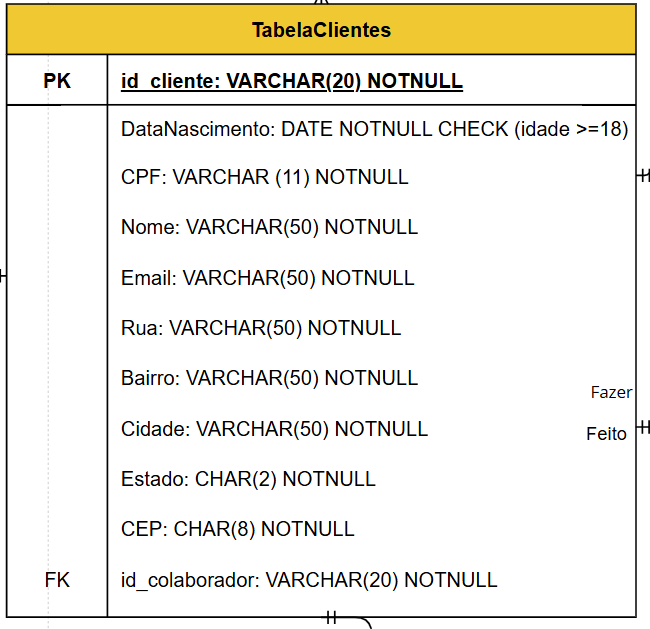

TabelaClientes(0:N)(Gerenciado/Gerencia)(1:1)TabelaColaboradores

In [6]:
import sqlite3 as sqlite

In [7]:
con = sqlite.connect('base.db')
cur = con.cursor()
con.close()

In [11]:
con = sqlite.connect('base.db')
cur = con.cursor()
cur.execute('''
CREATE TABLE TabelaClientes (
    id_cliente VARCHAR(20) PRIMARY KEY NOT NULL,
    DataNascimento DATE NOT NULL CHECK (strftime('%Y', 'now') - strftime('%Y', DataNascimento) >= 18),
    CPF VARCHAR(11) NOT NULL,
    Nome VARCHAR(50) NOT NULL,
    Email VARCHAR(50) NOT NULL,
    Rua VARCHAR(50) NOT NULL,
    Bairro VARCHAR(50) NOT NULL,
    Cidade VARCHAR(50) NOT NULL,
    Estado CHAR(2) NOT NULL,
    CEP CHAR(8) NOT NULL,
    id_colaborador VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_colaborador) REFERENCES TabelaColaboradores(id_colaborador)
);''')
con.commit()

In [13]:
#con = sqlite.connect('base.db')
# original.to_sql('base', con, if_exists='replace', index=False)
#cur = con.cursor()
cur.execute('''SELECT * FROM TabelaClientes;''')
tables = cur.fetchall()
tables

[]

In [14]:
con.close()

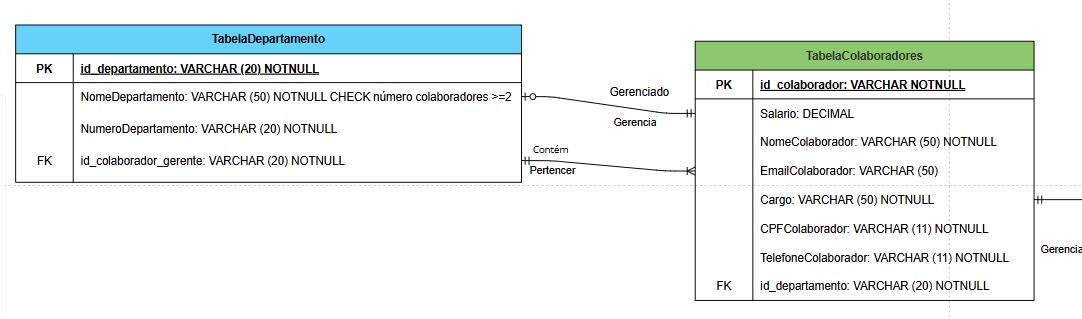

In [ ]:
CREATE TABLE TabelaDepartamento (
    id_departamento VARCHAR(20) PRIMARY KEY NOT NULL,
    NomeDepartamento VARCHAR(50) NOT NULL CHECK (numero_colaboradores >= 2),
    id_colaborador_gerente VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_colaborador_gerente) REFERENCES TabelaColaboradores(id_colaborador)
);

CREATE TABLE TabelaColaboradores (
    id_colaborador VARCHAR(20) PRIMARY KEY NOT NULL,
    Salario DECIMAL,
    NomeColaborador VARCHAR(50) NOT NULL,
    EmailColaborador VARCHAR(50),
    Cargo VARCHAR(50) NOT NULL,
    CPFColaborador VARCHAR(11) NOT NULL,
    TelefoneColaborador VARCHAR(11) NOT NULL,
    id_departamento VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_departamento) REFERENCES TabelaDepartamento(id_departamento)
);


SyntaxError: invalid syntax (1802094007.py, line 1)

In [6]:
```markdown
### Evaluación de la Consulta SQL

La consulta proporcionada define las tablas `TabelaDepartamento` y `TabelaColaboradores` con las siguientes relaciones y restricciones:

1. **Relación entre `TabelaDepartamento` y `TabelaColaboradores`:**
    - Un departamento (`TabelaDepartamento`) tiene un gerente (`id_colaborador_gerente`) que es un colaborador (`TabelaColaboradores`).
    - Un colaborador puede gerenciar uno o ningún departamento.
    - Un departamento debe tener al menos un gerente.

2. **Restricción de número mínimo de colaboradores en un departamento:**
    - Se intenta implementar una restricción para que un departamento tenga al menos 2 colaboradores mediante `CHECK (numero_colaboradores >= 2)`. Sin embargo, `numero_colaboradores` no está definido en la tabla, lo que hace que esta restricción sea inválida.

### Problemas Identificados

1. **Restricción de número mínimo de colaboradores:**
    - La restricción `CHECK (numero_colaboradores >= 2)` no es válida porque `numero_colaboradores` no es un campo de la tabla `TabelaDepartamento`. SQLite no admite restricciones basadas en el conteo de filas relacionadas.

2. **Relación de uno a uno entre `TabelaDepartamento` y el gerente:**
    - La relación de uno a uno entre un departamento y su gerente está correctamente definida mediante la clave foránea `id_colaborador_gerente`.

3. **Falta de validación para garantizar que un colaborador no gerencie más de un departamento:**
    - No se implementa una restricción para evitar que un colaborador gerencie más de un departamento.

### Posibles Mejoras

1. **Implementar la restricción de número mínimo de colaboradores:**
    - Dado que SQLite no admite restricciones basadas en conteos directamente, se puede manejar esta validación a nivel de aplicación o mediante triggers. Por ejemplo:

    ```sql
    CREATE TRIGGER VerificarNumeroColaboradores
    AFTER INSERT OR DELETE ON TabelaColaboradores
    BEGIN
         SELECT CASE
              WHEN (SELECT COUNT(*) FROM TabelaColaboradores WHERE id_departamento = NEW.id_departamento) < 2 THEN
                    RAISE(ABORT, 'Un departamento debe tener al menos 2 colaboradores.')
         END;
    END;
    ```

2. **Garantizar que un colaborador no gerencie más de un departamento:**
    - Esto se puede lograr añadiendo una restricción `UNIQUE` en la columna `id_colaborador_gerente` de la tabla `TabelaDepartamento`:

    ```sql
    ALTER TABLE TabelaDepartamento
    ADD CONSTRAINT UnicoGerente UNIQUE (id_colaborador_gerente);
    ```

3. **Documentar las reglas del negocio:**
    - Es importante documentar claramente las reglas del negocio en el diseño de la base de datos para evitar inconsistencias.

### Consulta Mejorada

```sql
CREATE TABLE TabelaDepartamento (
     id_departamento VARCHAR(20) PRIMARY KEY NOT NULL,
     NomeDepartamento VARCHAR(50) NOT NULL,
     id_colaborador_gerente VARCHAR(20) NOT NULL,
     FOREIGN KEY (id_colaborador_gerente) REFERENCES TabelaColaboradores(id_colaborador),
     CONSTRAINT UnicoGerente UNIQUE (id_colaborador_gerente)
);

CREATE TABLE TabelaColaboradores (
     id_colaborador VARCHAR(20) PRIMARY KEY NOT NULL,
     Salario DECIMAL,
     NomeColaborador VARCHAR(50) NOT NULL,
     EmailColaborador VARCHAR(50),
     Cargo VARCHAR(50) NOT NULL,
     CPFColaborador VARCHAR(11) NOT NULL,
     TelefoneColaborador VARCHAR(11) NOT NULL,
     id_departamento VARCHAR(20) NOT NULL,
     FOREIGN KEY (id_departamento) REFERENCES TabelaDepartamento(id_departamento)
);

CREATE TRIGGER VerificarNumeroColaboradores
AFTER INSERT OR DELETE ON TabelaColaboradores
BEGIN
     SELECT CASE
          WHEN (SELECT COUNT(*) FROM TabelaColaboradores WHERE id_departamento = NEW.id_departamento) < 2 THEN
                RAISE(ABORT, 'Un departamento debe tener al menos 2 colaboradores.')
     END;
END;
```

### Conclusión

La consulta original tiene problemas relacionados con la implementación de las reglas del negocio. Las mejoras propuestas abordan estas limitaciones mediante el uso de restricciones `UNIQUE` y triggers para garantizar la consistencia de los datos y el cumplimiento de las reglas del negocio.
```

SyntaxError: invalid syntax (4222991161.py, line 1)

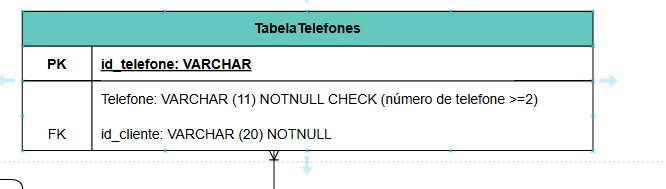

In [1]:
CREATE TABLE TabelaTelefones (
    id_telefone VARCHAR(11) PRIMARY KEY NOT NULL,
    id_cliente VARCHAR(20) NOT NULL,
    Telefone VARCHAR(11) NOT NULL,
    FOREIGN KEY (id_cliente) REFERENCES TabelaClientes(id_cliente)
);

SyntaxError: invalid syntax (550678103.py, line 1)

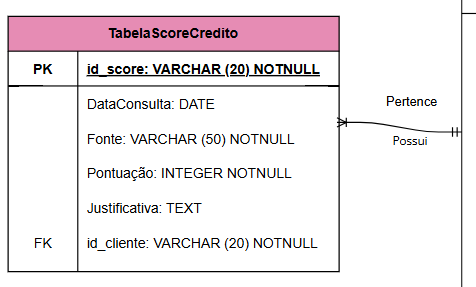

In [ ]:
CREATE TABLE TabelaScoreCredito(
    id_score VARCHAR(20) PRIMARY KEY NOT NULL,
    DataConsulta DATE,
    Fonte VARCHAR(50) NOT NULL,
    Puntuacao INTEGER NOT NULL,
    Justificativa TEXT,
    id_cliente VARCHAR(20) PRIMARY KEY NOT NULL,
    FOREIGN KEY (id_cliente) REFERENCES TabelaClientes(id_cliente)
);

SyntaxError: invalid syntax (501872115.py, line 1)

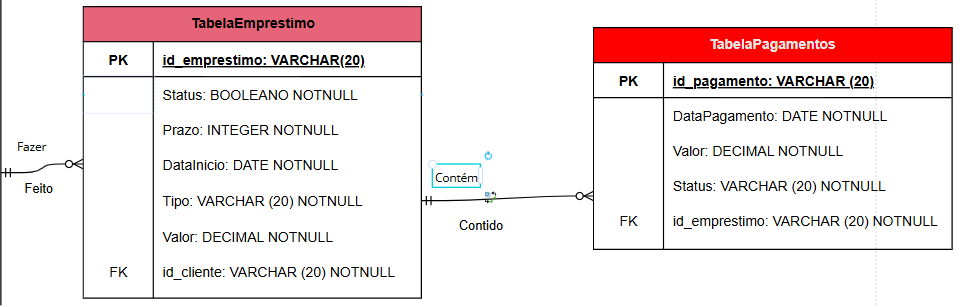
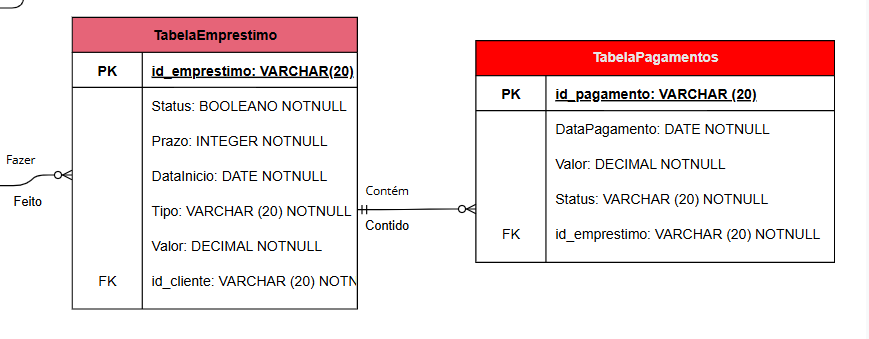

In [ ]:
CREATE TABLE TabelaEmprestimo(
    id_emprestimo VARCHAR(20) PRIMARY KEY NOT NULL,
    Status BOOLEAN NOT NULL,
    Prazo INTEGER NOT NULL,
    DataInicio DATE NOT NULL,
    Tipo VARCHAR(20) NOT NULL,
    Valor DECIMAL NOT NULL,
    id_cliente VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_cliente) REFERENCES TabelaClientes(id_cliente)
);

CREATE TABLE TabelaPagamentos (
    id_pagamento VARCHAR(20) PRIMARY KEY NOT NULL,
    DataPagamento DATE NOT NULL,
    Valor DECIMAL NOT NULL,
    Status VARCHAR(20) NOT NULL,
    id_emprestimo VARCHAR(20) NOT NULL,
    FOREIGN KEY (id_emprestimo) REFERENCES TabelaEmprestimos(id_emprestimo)
);

SyntaxError: invalid syntax (3829745634.py, line 1)

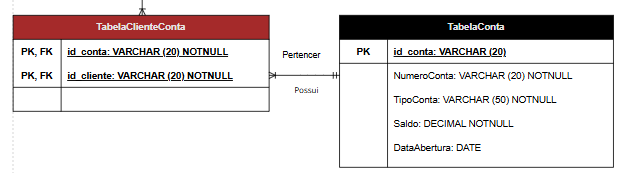

In [5]:
CREATE TABLE TabelaClienteConta(
    id_conta VARCHAR(20) PRIMARY KEY NOT NULL,
    id_cliente VARCHAR(20) PRIMARY KEY NOT NULL,
    FOREIGN KEY (id_cliente) REFERENCES TabelaClientes(id_cliente),
    FOREIGN KEY (id_conta) REFERENCES TabelaConta(id_conta)
);

CREATE TABLE TabelaConta(
    id_conta VARCHAR(20) PRIMARY KEY NOT NULL,
    NumeroConta VARCHAR(20) NOT NULL,
    TipoConta VARCHAR(50) NOT NULL,
    Saldo DECIMAL NOT NULL,
    DataAbertura DATE
);

SyntaxError: invalid syntax (2705172770.py, line 1)